In [22]:
import numpy as np     
import random    
import pandas as pd  
import matplotlib.pyplot as plt

In [23]:
news_data=pd.read_csv('preprocessed_news.csv')

In [24]:
heading_list = ["Life", 'Entertainment', "World", 'Video']

In [25]:
cat_dict={}
for i in range(len(heading_list)):
    cat_dict[i]=heading_list[i]

In [26]:
number_of_categories=len(heading_list)

## dividing into the 4 main categories

In [27]:
def createHeading(item):
    if item in ["lifestyle", "health", "weather", "foodanddrink", "travel", "kids"]:
        return "Life"
    elif item in ['entertainment', 'tv', 'movies', 'music', 'sports']:
        return "Entertainment"
    elif item in ['news', 'finance', 'middleeast', 'northamerica', 'autos']:
        return "World"
    else:
        return "Video"

In [28]:
news_data["Heading"] = news_data["category"].map(createHeading)

## user interaction

In [29]:
def user_interaction(article,like_probabilities):
    click_probability = like_probabilities[article]
    reward = np.random.binomial(1, click_probability)
    return reward

## thompson sampling

In [30]:
alpha=np.ones(number_of_categories)
beta=np.ones(number_of_categories)
probability_1=[]
probability_2=[]
probability_3=[]
probability_4=[]
visited_category1=[]
visited_category2=[]
rewards=[]
z=0
while z<400:
    high_prob=-1
    for i in range(number_of_categories):
        prob = np.random.beta(alpha[i],beta[i])
        if prob>high_prob:
            high_prob=prob
            category=i
    
        
    random_news=news_data[news_data['Heading']==cat_dict[category]].sample(n=1)
    
    if z>30:
        visited_category2.append(category)
        did_user_like=user_interaction(category,[0.2, 0.4, 0.3, 0.75])
    else:
        visited_category1.append(category)
        did_user_like=user_interaction(category,[0.2, 0.75, 0.3, 0.1])
    if not did_user_like:
        rewards.append(-1)
    else:
        rewards.append(1)
    
    alpha[category]+=did_user_like
    beta[category]+=(1-did_user_like)
    z+=1
    probability_1.append(alpha[0]/(alpha[0]+beta[0]))
    probability_2.append(alpha[1]/(alpha[1]+beta[1]))
    probability_3.append(alpha[2]/(alpha[2]+beta[2]))
    probability_4.append(alpha[3]/(alpha[3]+beta[3]))




## mean distribution for all the arms

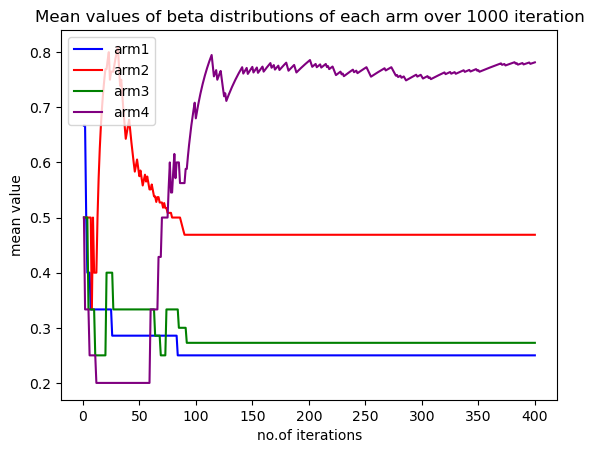

In [31]:


# Generate some example data for four lines
x = np.linspace(1, 400, 400)
y1 = probability_1
y2 = probability_2
y3 = probability_3
y4 = probability_4

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot each line with a different color and label
ax.plot(x, y1, label='arm1', color='blue')
ax.plot(x, y2, label='arm2', color='red')
ax.plot(x, y3, label='arm3', color='green')
ax.plot(x, y4, label='arm4', color='purple')

# Add a legend to the plot
ax.legend()

# Add axis labels and a title to the plot
ax.set_xlabel('no.of iterations')
ax.set_ylabel('mean value')
ax.set_title('Mean values of beta distributions of each arm over 1000 iteration')

# Show the plot
plt.show()


## frequency of article categories

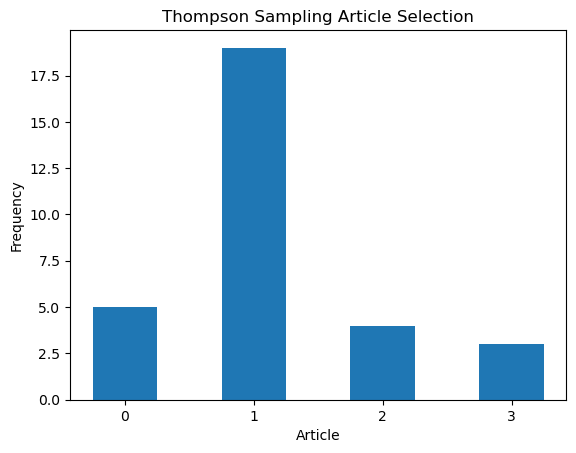

In [32]:
plt.hist(visited_category1, bins=np.arange(4+1)-0.5,rwidth=0.5, align='mid')
plt.xticks(range(4))
plt.xlabel('Article')
plt.ylabel('Frequency')
plt.title('Thompson Sampling Article Selection')
plt.show()

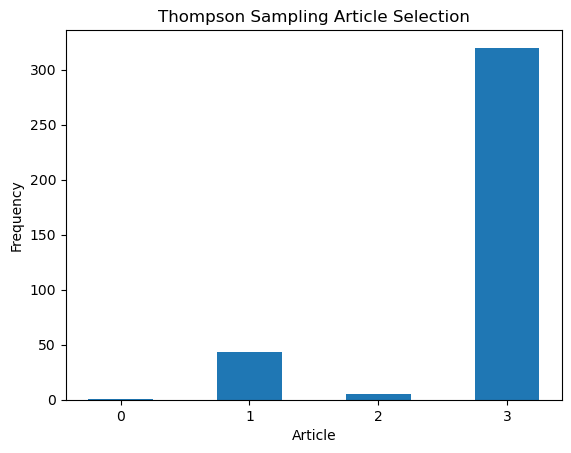

In [33]:
plt.hist(visited_category2, bins=np.arange(4+1)-0.5,rwidth=0.5, align='mid')
plt.xticks(range(4))
plt.xlabel('Article')
plt.ylabel('Frequency')
plt.title('Thompson Sampling Article Selection')
plt.show()